In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import random
import matplotlib.animation as animation

In [2]:
def energy_calc(lattice):
    # Calculate lattice energy, first copies of the lattice shifted once along the columns and once along the rows are made.
    # Multiplication of these copies with the lattice will give all NN interactions(without double counting).
    a = lattice[:,1:]*lattice[:,:N-1]
    b = lattice[:N-1,:]*lattice[1:,:]
    # To ensure periodic boundary conditions the last column is multiplied with the first column of the lattice array. 
    # Same is done with the rows.
    c = lattice[0]*lattice[N-1]
    d = lattice[:,0]*lattice[:,N-1]
    # Energy:
    E = -1*(np.sum(a)+np.sum(b)+np.sum(c)+np.sum(d))
    
    return(E)

In [3]:
def energy_nn(lattice,x,y):
    # Calculate interaction energy nn of 1 spin. 
    s = lattice[x,y]
    nn = lattice[(x+1)%N,y] + lattice[(x-1)%N,y] + lattice[x,(y+1)%N] + lattice[x,(y-1)%N]
    E = -1*nn*s
    
    return(E)

In [4]:
def metropolis(lattice,E,M):
    # Implement metropolis algorithm.
    # Select random spin (propose trial lattice with probability 1/L^2):
    x = random.randrange(0,N)
    y = random.randrange(0,N)
    trial_lattice = np.copy(lattice)
    trial_lattice[x,y] *= -1
    # Calculate energy difference between the old and trial configurations:
    dE = energy_nn(trial_lattice,x,y) - energy_nn(lattice,x,y)
    # Implement second stage of the metropolis algorithm:
    if dE <= 0:
        E = E + dE
        M = M - lattice[x,y] + trial_lattice[x,y] # substract old spin value and add new spin value to the magnetisation
        lattice[x,y] = trial_lattice[x,y]
    else:
        r = random.uniform(0,1)
        if dE == 4:
            p = A[0]
        else:
            p = A[1]
        if r < p:
            E = E + dE
            M = M - lattice[x,y] + trial_lattice[x,y] # substract old spin value and add new spin value to the magnetisation
            lattice[x,y] = trial_lattice[x,y]
            
    return(lattice,E,M)

In [20]:
def make_anim(configs):
    fig = plt.figure()
    im = plt.imshow(configs[0], vmin=0.5, vmax=2, interpolation='none', extent=(0,N,0,N))
    
    def init():
    
        return(configs[0])
    
    def animate(i):
        im.set_data(configs[i])
    
        return(im)
    
    anim = animation.FuncAnimation(fig, animate,init_func=init, frames=t, interval=500)
    
    return(anim)

In [6]:
N = 4
lattice = lattice = np.random.choice([1,-1],size=(N,N))
print(lattice)
M = np.sum(lattice)
print(M)

[[ 1 -1 -1  1]
 [ 1 -1  1 -1]
 [-1 -1 -1  1]
 [-1  1  1  1]]
0


# Simulation

In [43]:
# set parameters and initial values
N =20 #lattice number
tau = 0.55 # reduced temperature (J/kT)
N_samples = 200
t_sample = 5 # sample time in units of MCS, from  data is extracted
lattice = np.random.choice([1,-1],size=(N,N))
lattice = np.ones((N,N))
E = energy_calc(lattice)
A = np.array([np.exp(-4*tau),np.exp(-8*tau)]) # store possible values of the acceptance probability (can only be two values)
M = np.sum(lattice) # magnetisation
T = np.linspace(1,7,10) # set temperatures

configs = np.zeros([N_samples*t_sample+1,N,N]) # array to keep track of the lattice with each time step
energy = [] # empty list to store the energy E with each time step
magnetisation = [] # empty list to store the magnetisation M with each time step
magnetisation.append(M/N**2)
energy.append(E)

configs[0]=lattice
for i in range(N_samples):
    for j in range(t_sample):
        for k in range(N**2):
            lattice, E, M = metropolis(lattice,E,M)
        magnetisation.append(M/N**2)
        energy.append(E)
        configs[j+i*5+1]=lattice

#nim = make_anim(configs)
#TML(anim.to_html5_video())

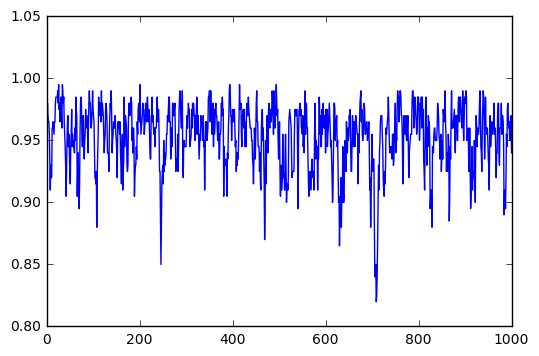

In [44]:
x=np.arange(len(magnetisation))    
plt.plot(x,magnetisation)
plt.show()

In [21]:
print('energy:')
print(energy)
print('\n')
print('magnetisation:')
print(magnetisation)

energy:
[8, 8, 8, 4, 0, -4, -4, -4, -4, -4, -4, -4, -4, -4, -8, -8, -12, -12, -12, -16, -16, -16, -16, -16, -20, -24, -24, -28, -32, -32, -32, -36, -36, -36, -36, -36, -36, -36, -36, -40, -40, -40, -44, -48, -48, -48, -48, -48, -48, -48, -48, -48, -48, -56, -56, -56, -56, -56, -56, -56, -56, -56, -56, -56, -56, -56, -56, -60, -60, -60, -60, -64, -64, -64, -64, -64, -64, -68, -68, -72, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76]


magnetisation:
[-6, -8, -10, -12, -10, -8, -8, -10, -12, -12, -12, -12, -14, -14, -12, -12, -14, -16, -18, -16, -14, -14, -14, -14, -16, -18, -18, -20, -22, -24, -22, -20, -20, -18, -16, -14, -16, -16, -18, -20, -20, -20, -18, -16, -16, -16, -16, -18, -18, -20, -18, -16, -16, -18, -18, -20, -20, -22, -22, -20, -20, -20, -18, -18, -18, -16, -16, -14, -12, -12, -12, -10, -10, -12, -12, -10, -10, -12, -10, -12, -10, -12, -10, -10, -12, -12, -10, -8, -8, -6, -6, -6, -6, -8, -8, -8, -8, -8, -8, -10]


In [23]:
# process data

energy_ensemble = []
for i in range(t):
    energy_ensemble = np.mean(energy[i*t_sample:(i+1)*t_sample])
    
energy_ensemble

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

# Debugging

In [24]:
fig = plt.figure()

im = plt.imshow(configs[0], vmin=0.5, vmax=2, interpolation='none', extent=(0,N,0,N))

def init():
    
    return(configs[0])

def animate(i):
    im.set_data(configs[i])
    
    return(im)
   
anim = animation.FuncAnimation(fig, animate,init_func=init, frames=99, interval=100)
HTML(anim.to_html5_video())


In [48]:
lattice = np.random.choice([1,-1],size=(N,N))
#lattice = np.ones((N,N))
E = energy_calc(lattice)

fig = plt.figure()


#lattice=np.full((N,N),1)

im = plt.imshow(lattice, vmin=0.5, vmax=2, interpolation='none')

def init():
    lattice=np.full((N,N),1)

def animate(i):
    y, z = metropolis(lattice,E)
    im.set_data(y)
    return(im)
   
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=100)
HTML(anim.to_html5_video())


/opt/conda/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((8, 8), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [46]:
plot = plt.matshow(lattice)
update(lattice)

plt.show()

TypeError: Image data can not convert to float

In [230]:
E = energy_calc(lattice)
print(E)
x = random.randrange(0,N)
y = random.randrange(0,N)
print(x,y)
spin = lattice[x,y]

-4
1 2


In [231]:
trial_lattice = np.copy(lattice)
trial_lattice[x,y] *= -1
print(lattice)
print(trial_lattice)

[[ 1 -1  1  1]
 [ 1 -1  1  1]
 [-1  1  1 -1]
 [ 1  1  1 -1]]
[[ 1 -1  1  1]
 [ 1 -1 -1  1]
 [-1  1  1 -1]
 [ 1  1  1 -1]]


In [232]:
dE = energy_nn(trial_lattice,x,y) - energy_nn(lattice,x,y)
print(dE)
if dE <= 0:
    lattice[x,y] = trial_lattice[x,y]
    E = E + dE
else:
    r = random.uniform(0,1)
    p = np.exp(-dE)
    if r < p:
        lattice[x,y] = trial_lattice[x,y]
        E = E + dE
print(lattice,E)    

4
[[ 1 -1  1  1]
 [ 1 -1  1  1]
 [-1  1  1 -1]
 [ 1  1  1 -1]] -4
